In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from hockey_rink import IIHFRink
from scipy.stats import binned_statistic, binned_statistic_2d

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# Data Directory
data_dir = "../../Data/Big-Data-Cup-2021"
bucketless_data_dir = '../../Data/bdc/data'
tracking_data_dir = "{}/TrackingData".format(data_dir)
db_path = '/Users/keltim01/Documents/databases/'

#connect to database 
conn = sqlite3.connect(db_path + 'bdc_2022.db')
cursor = conn.cursor()


In [3]:
df_train = pd.read_sql(
    '''
    SELECT * FROM pbp_training;
    '''
,conn)

In [4]:
df_shots = pd.read_sql(
    '''
    SELECT * FROM pbp_shots;
    '''
,conn)

In [5]:
df_train.shape

(50884, 63)

In [6]:
df_train.loc[df_train['event'] == 'Play','detail_2'].unique()

array([None], dtype=object)

In [7]:
df_train.event.unique()

array(['Faceoff Win', 'Puck Recovery', 'Dump In/Out', 'Zone Entry',
       'Play', 'Takeaway', 'Incomplete Play', 'Shot', 'Penalty Taken',
       'Goal'], dtype=object)

In [8]:
df_shots.shape

(709, 69)

In [9]:
df_train['x_coord_adj'] = df_train['x_coord'].apply(lambda x: x-100)
df_train['y_coord_adj'] = df_train['y_coord'].apply(lambda x: x-42.5)
df_train['x_end_coord_adj'] = df_train['x_coordinate_2'].apply(lambda x: x-100)
df_train['y_end_coord_adj'] = df_train['y_coordinate_2'].apply(lambda x: x-42.5)

In [10]:
df_move = df_train[(df_train.event == 'Play') | (df_train.event == 'Incomplete Play')].copy()

In [11]:
df_shots['x_coord_adj'] = df_shots['x_coord'].apply(lambda x: x-100)
df_shots['y_coord_adj'] = df_shots['y_coord'].apply(lambda x: x-42.5)

In [12]:
df_move[['x_coord', 'y_coord', 'x_coordinate_2', 'y_coordinate_2']].describe()

,x_coord,y_coord,x_coordinate_2,y_coordinate_2
count,20784.000000,20784.000000,20784.000000,20784.000000
mean,93.920420,42.218726,105.548884,42.137173
std,66.036963,28.122507,59.297857,27.154036
min,0.000000,0.000000,0.000000,0.000000
25%,30.000000,15.000000,54.000000,17.000000
50%,87.000000,42.000000,110.000000,42.000000
75%,154.000000,70.000000,157.000000,68.000000
max,200.000000,85.000000,200.000000,85.000000


-114.28571428571429
-100.0
-85.71428571428572
-71.42857142857143
-57.142857142857146
-42.85714285714286
-28.571428571428573
-14.285714285714286
0.0
14.285714285714286
28.571428571428573
42.85714285714286
57.142857142857146
71.42857142857143
85.71428571428572
100.0
114.28571428571429
-42.5
-33.05555555555556
-23.61111111111111
-14.166666666666668
-4.722222222222222
4.722222222222222
14.166666666666668
23.61111111111111
33.05555555555556
42.5


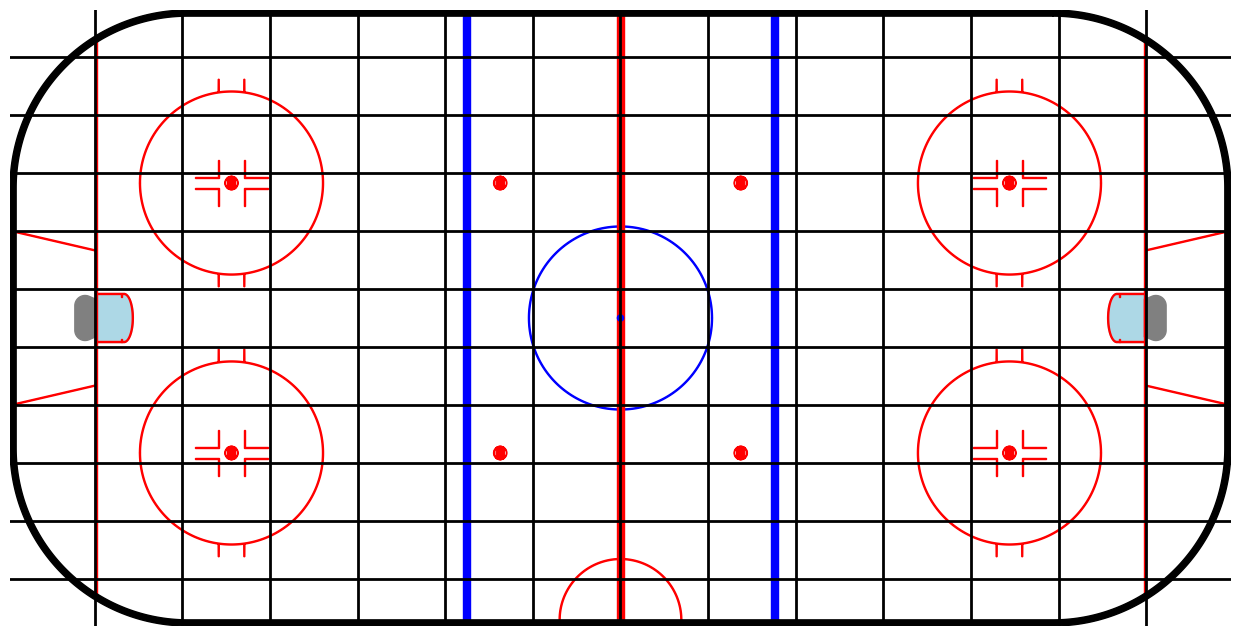

In [13]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
for i in (100 / 7) * np.arange(-8, 9):
    ax.axvline(i, color='black', lw=2, zorder=100)
    print(i)

for i in 85 / 9 * np.arange(-4.5, 5):
    ax.axhline(i, color='black', lw=2, zorder=100)
    print(i)
# ax.axvline(-50, color='black', lw=2, zorder=100)
# ax.axvline(-25, color='black', lw=2, zorder=100)
# ax.axvline(0, color='black', lw=2, zorder=100)
# ax.axvline(25, color='black', lw=2, zorder=100)
# ax.axvline(50, color='black', lw=2, zorder=100)

plt.show()

fig.savefig('figs/xt_grid.png',bbox_inches='tight')

In [14]:
moving_actions = binned_statistic_2d(
    df_move['y_coord_adj'], 
    df_move['x_coord_adj'], 
    None, 
    statistic='count', 
    bins=[(85 / 9 * np.arange(-4.5, 5)), (100 / 7) * np.arange(-8, 9)]
    )

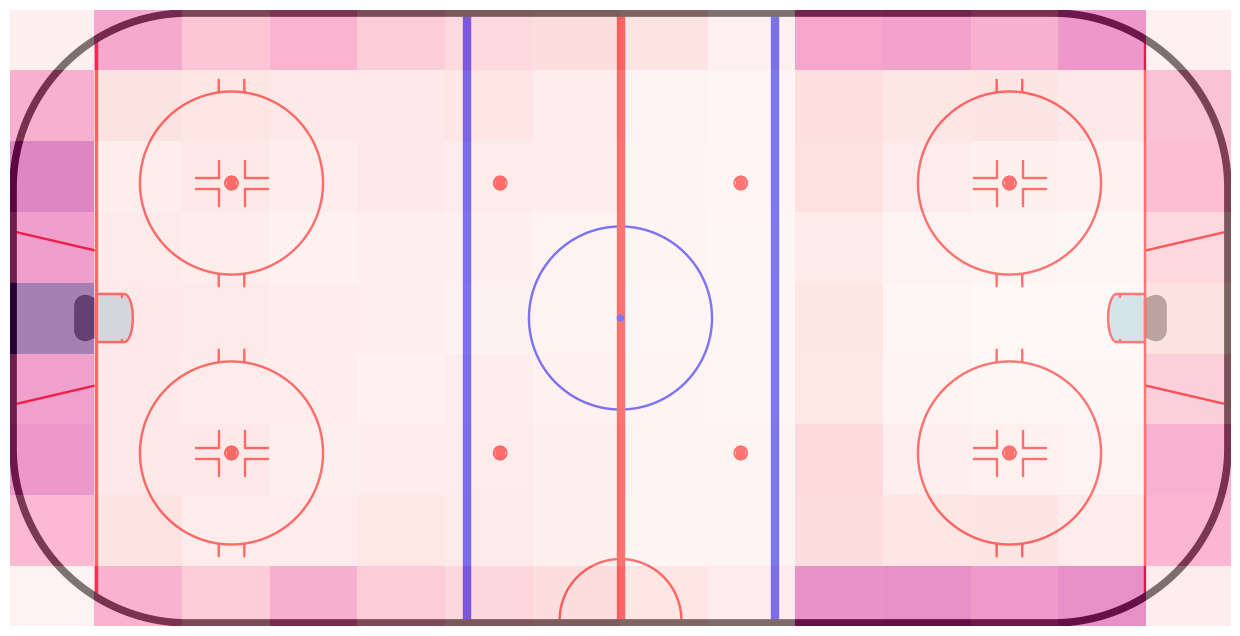

In [15]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(moving_actions.statistic, cmap='RdPu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

In [16]:
shots = binned_statistic_2d(
    df_shots['y_coord_adj'], 
    df_shots['x_coord_adj'], 
    None, 
    statistic='count', 
    bins=[(85 / 9 * np.arange(-4.5, 5)),(100 / 7) * np.arange(-8, 9)]
          )

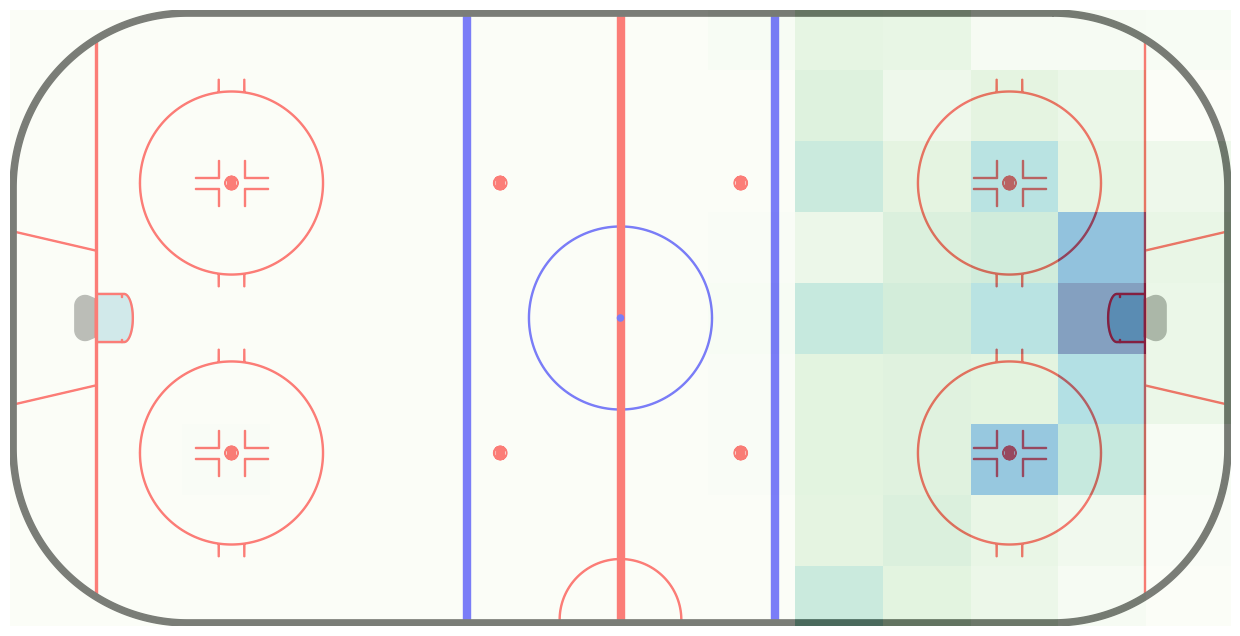

In [17]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(shots.statistic, cmap='GnBu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

In [18]:
goals = binned_statistic_2d(
    df_shots.loc[df_shots['is_goal'] == 1,'y_coord_adj'], 
    df_shots.loc[df_shots['is_goal'] == 1,'x_coord_adj'], 
    None, 
    statistic='count', 
    bins=[(85 / 9 * np.arange(-4.5, 5)),(100 / 7) * np.arange(-8, 9)]
    )

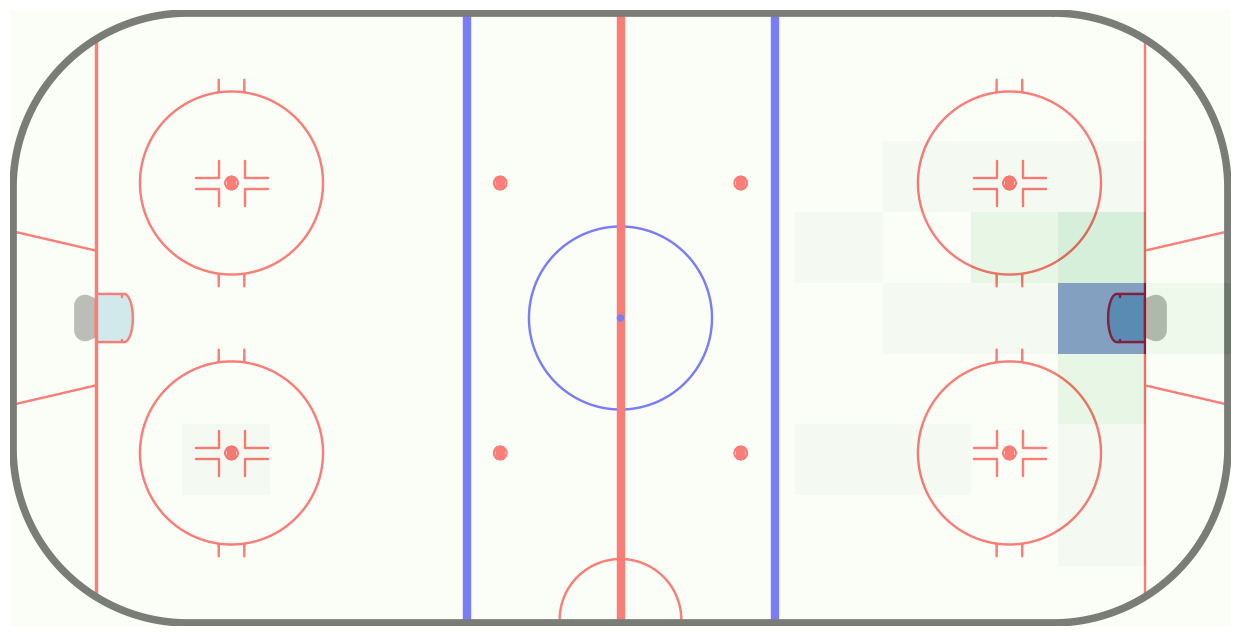

In [19]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(goals.statistic, cmap='GnBu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

In [61]:
move_prob = moving_actions.statistic / (moving_actions.statistic + shots.statistic)
move_prob = np.nan_to_num(move_prob, nan=0)

/var/folders/ts/3wmv3bq14n37zqx8km69cxtm0000gn/T/ipykernel_3146/1065149107.py:1: RuntimeWarning: invalid value encountered in divide
  move_prob = moving_actions.statistic / (moving_actions.statistic + shots.statistic)


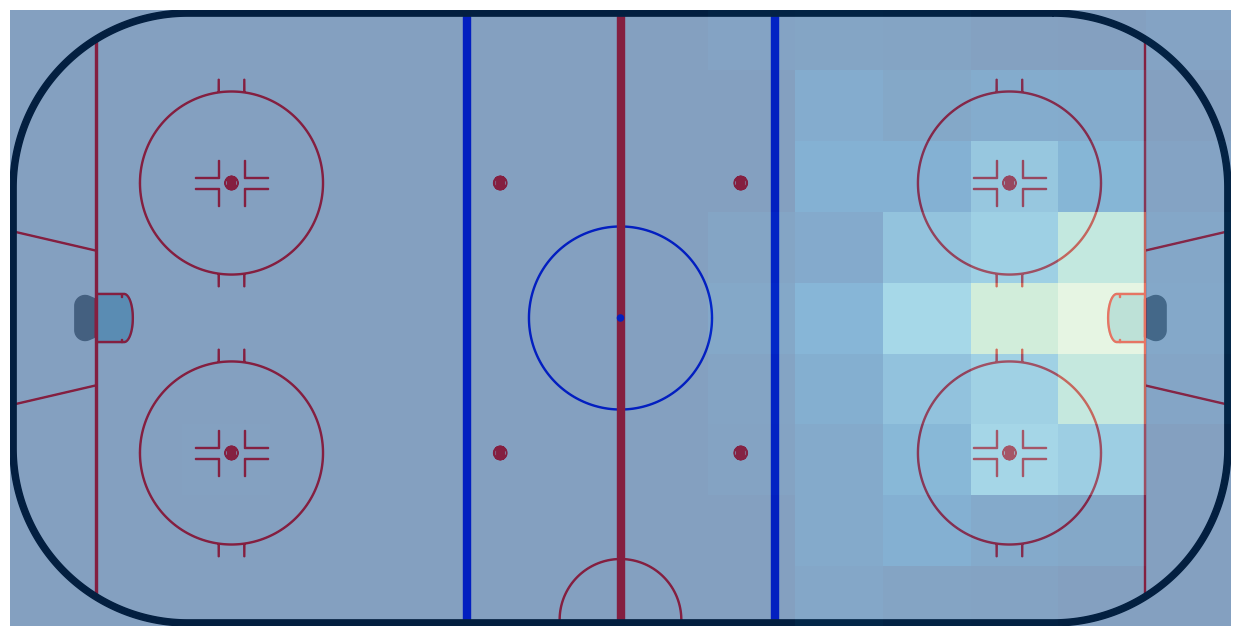

In [62]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(move_prob, cmap='GnBu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

In [63]:
shot_prob = shots.statistic / (moving_actions.statistic + shots.statistic)
shot_prob = np.nan_to_num(shot_prob, nan=0)

/var/folders/ts/3wmv3bq14n37zqx8km69cxtm0000gn/T/ipykernel_3146/957342099.py:1: RuntimeWarning: invalid value encountered in divide
  shot_prob = shots.statistic / (moving_actions.statistic + shots.statistic)


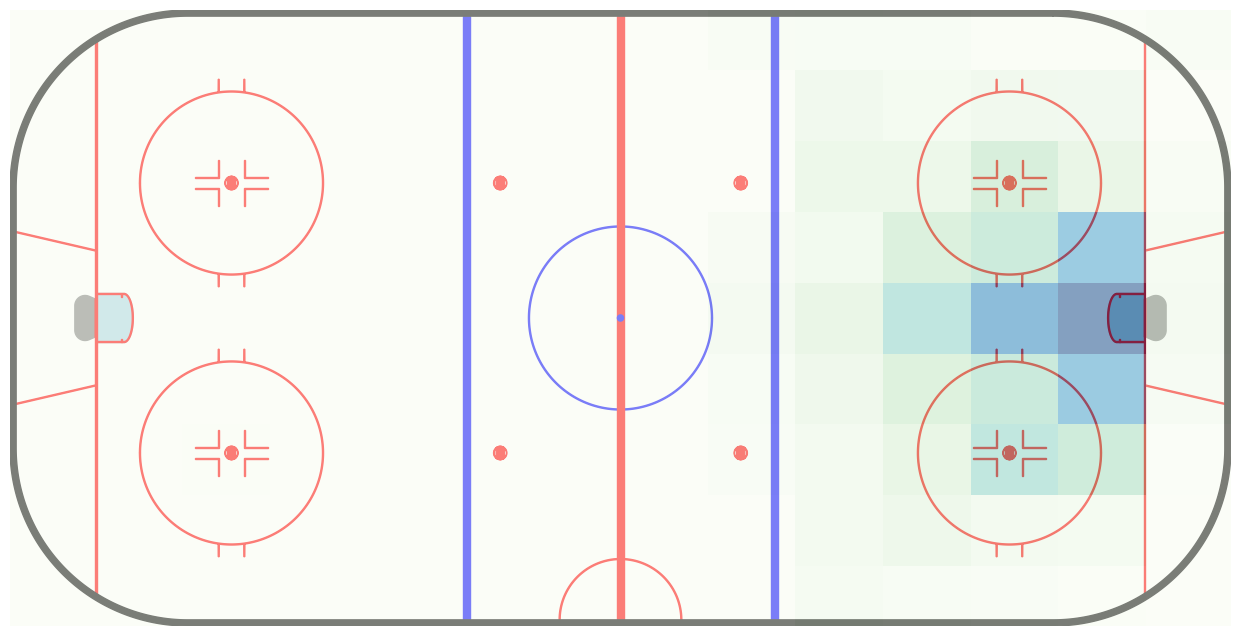

In [64]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(shot_prob, cmap='GnBu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

In [65]:
goal_prob = binned_statistic_2d(
    df_shots['y_coord_adj'], 
    df_shots['x_coord_adj'], 
    df_shots['expected_goals'], 
    statistic='mean', 
    bins=[ 85 / 9 * np.arange(-4.5, 5), (89 / 7) * np.arange(-8, 9)]
    )
goal_prob = np.nan_to_num(goal_prob.statistic)

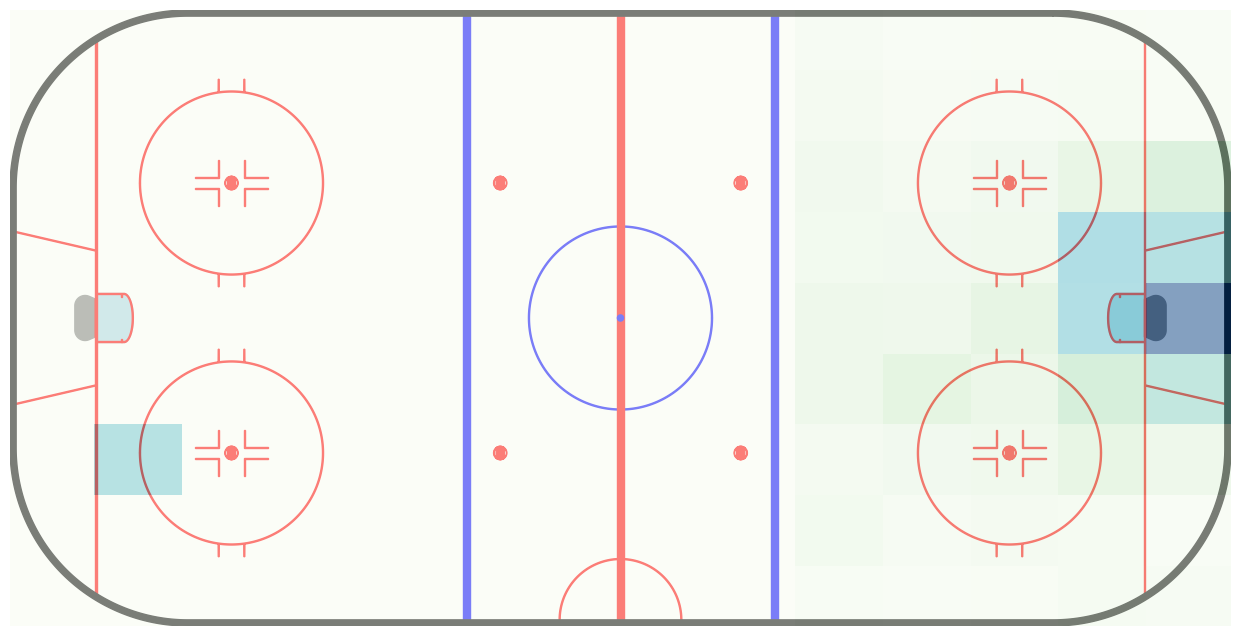

In [66]:
rink = IIHFRink()

fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(goal_prob, cmap='GnBu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

In [67]:
df_move.loc[:,'y_start'] = pd.cut(df_move.loc[:,'y_coord_adj'], bins=9, labels=False)
df_move.loc[:,'x_start'] = pd.cut(df_move.loc[:,'x_coord_adj'], bins=16, labels=False)
df_move.loc[:,'y_end'] = pd.cut(df_move.loc[:,'y_end_coord_adj'], bins=9, labels=False)
df_move.loc[:,'x_end'] = pd.cut(df_move.loc[:,'x_end_coord_adj'], bins=16, labels=False)

In [68]:
df_counts_starts_new = df_move[['x_start', 'y_start']].groupby(['x_start', 'y_start']).size().reset_index().rename(columns={0:'count_starts'})

In [69]:
transition_matrices = []
for i, row in df_counts_starts_new.iterrows():
    start_sector = row[['y_start', 'x_start']].values
    count_starts = row['count_starts']
    this_sector = df_move.loc[(df_move['y_start'] == start_sector[0]) & (df_move['x_start'] == start_sector[1])]
    df_counts_ends = this_sector[['y_end', 'x_end']].groupby(['y_end', 'x_end']).size().reset_index().rename(columns={0:'count_ends'})
    T_matrix = np.zeros((9, 16))
    for j, row2 in df_counts_ends.iterrows():
        end_sector = row2[['y_end', 'x_end']].values
        count_ends = row2['count_ends']
        T_matrix[end_sector[0], end_sector[1]] = count_ends / count_starts
    T_matrix = T_matrix / count_starts
    transition_matrices.append(T_matrix)

In [70]:
transition_matrices[0].shape

(9, 16)

In [71]:
11*14, 9*16

(154, 144)

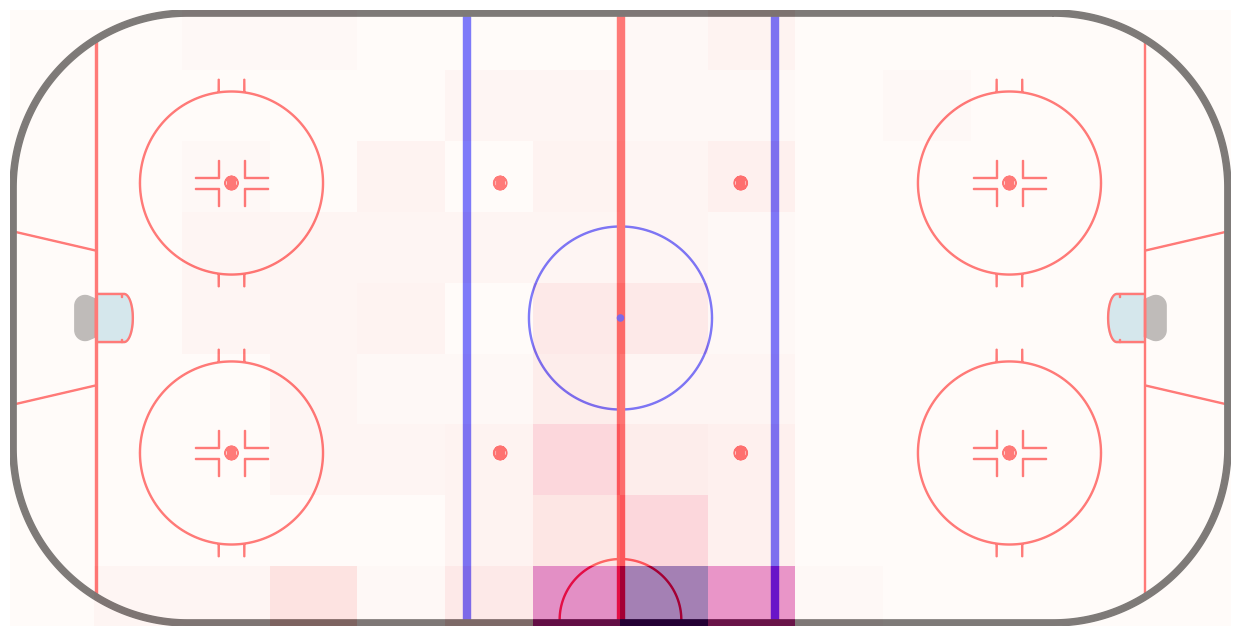

In [72]:
rink = IIHFRink()
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(transition_matrices[54], cmap='RdPu', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)

plt.show()

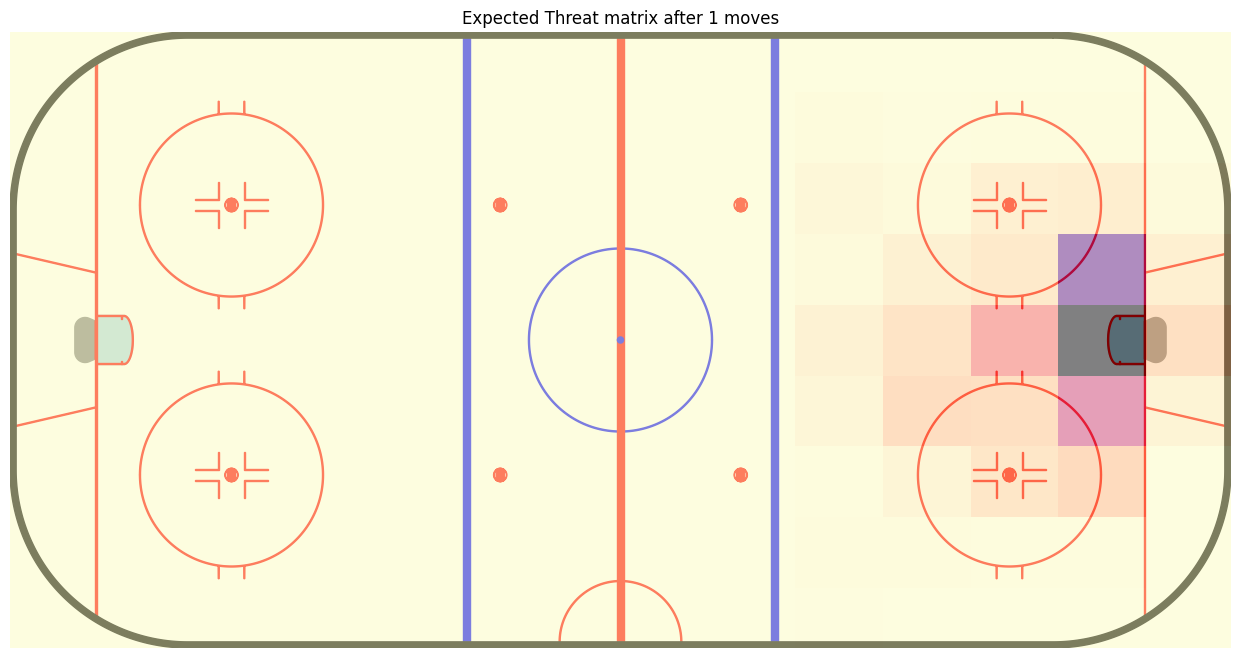

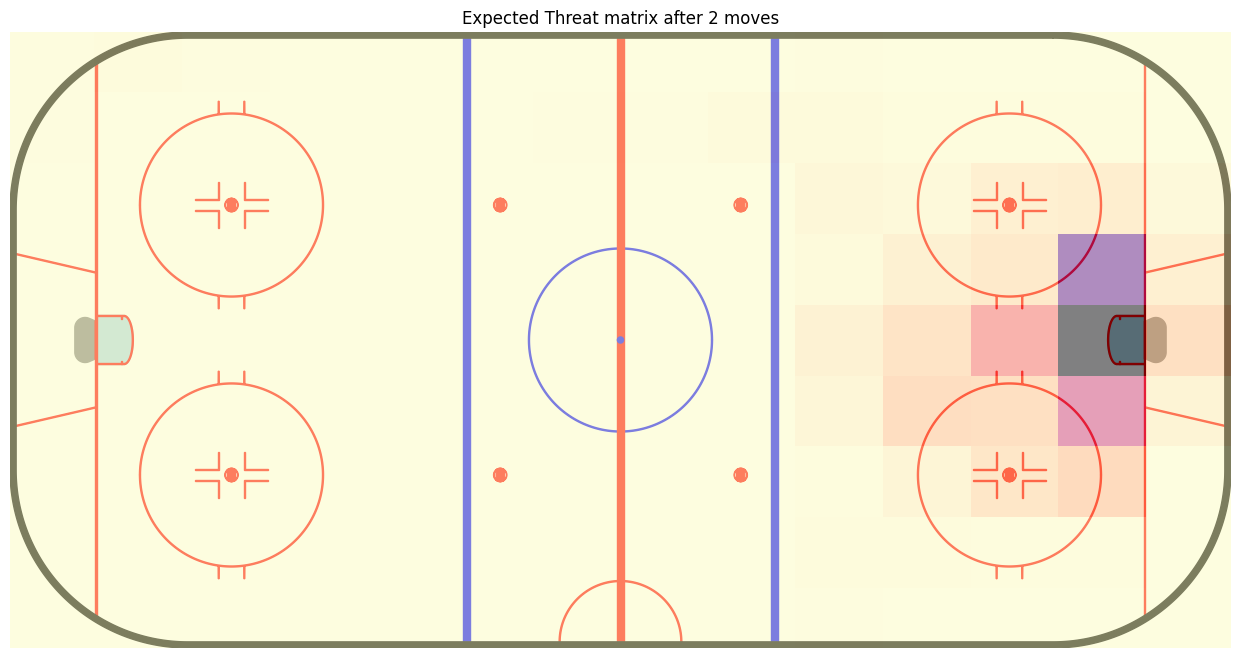

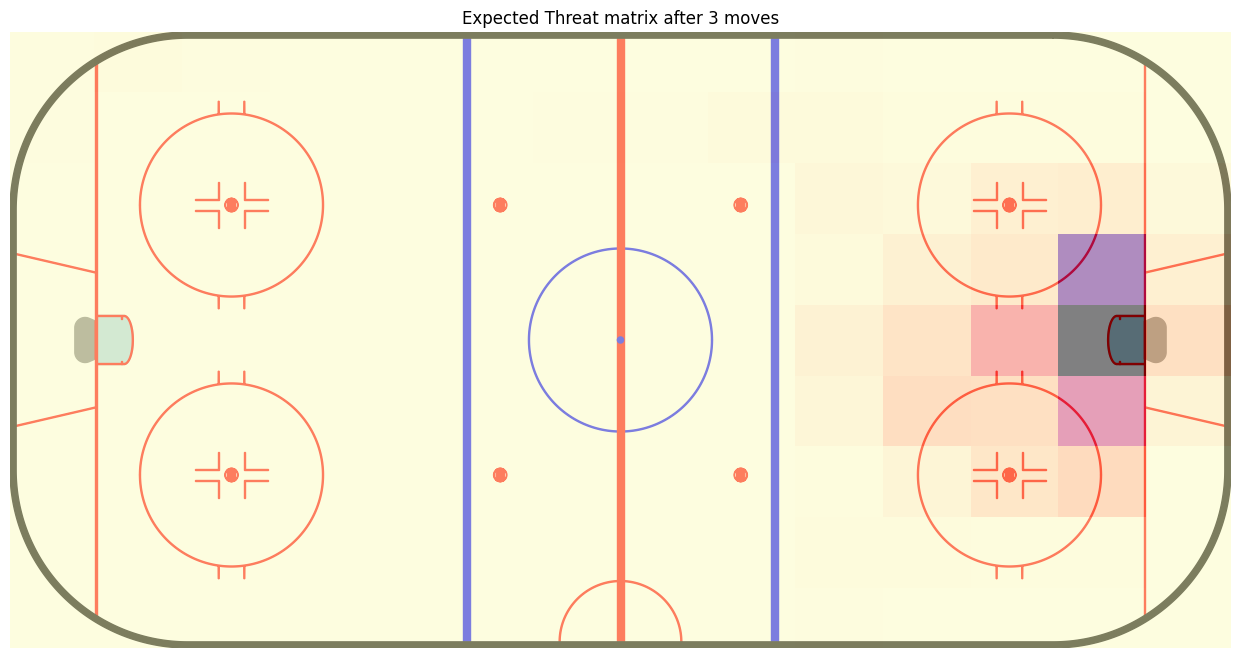

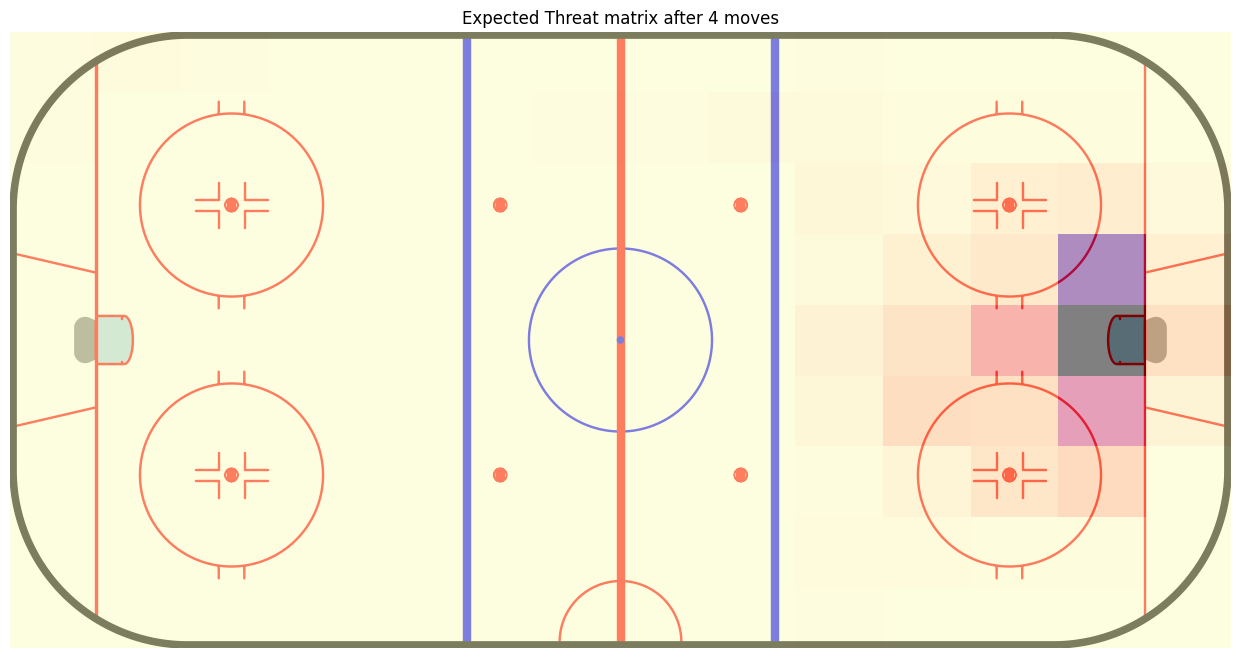

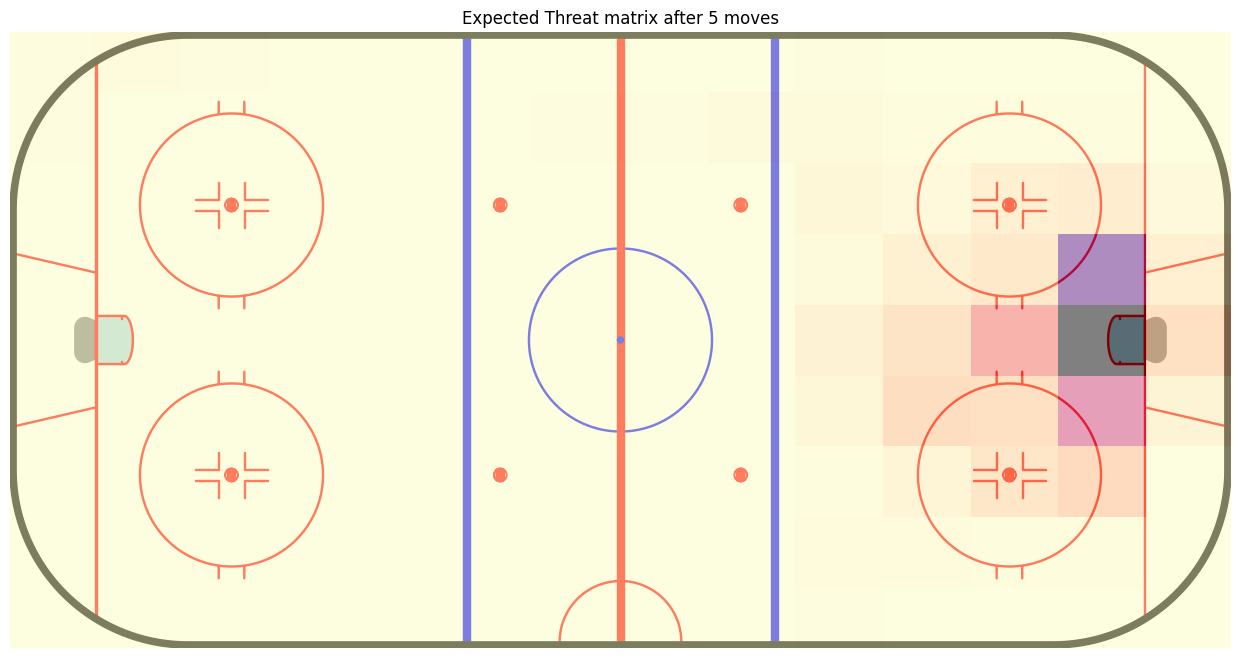

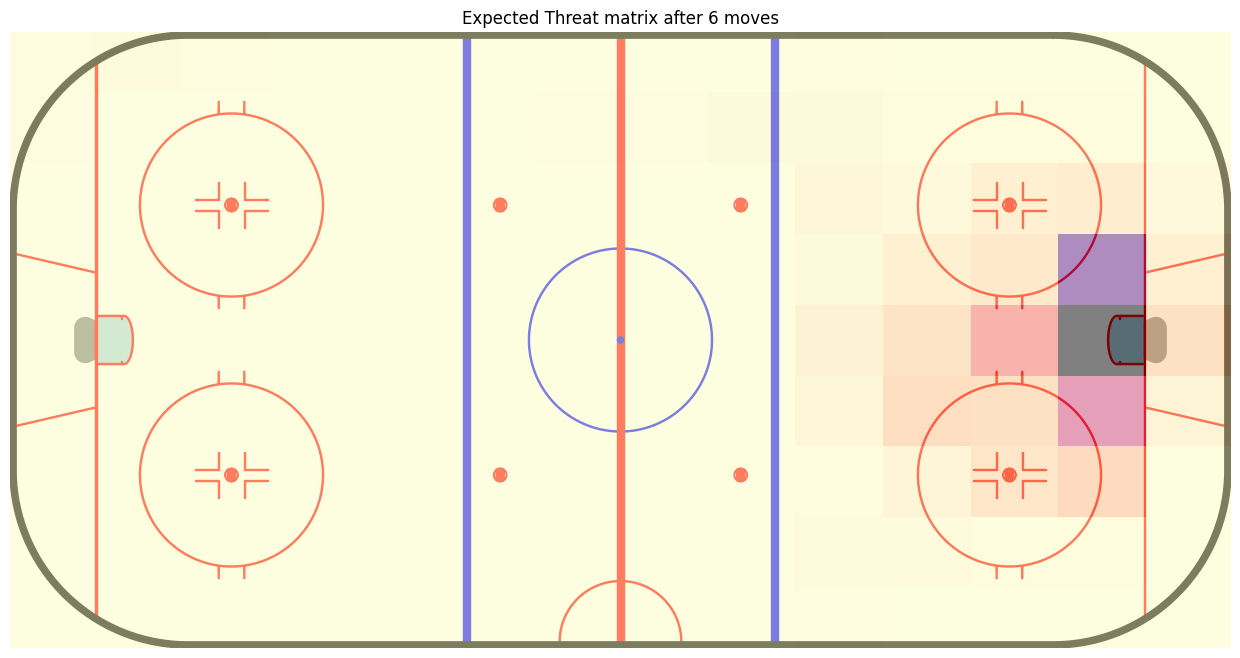

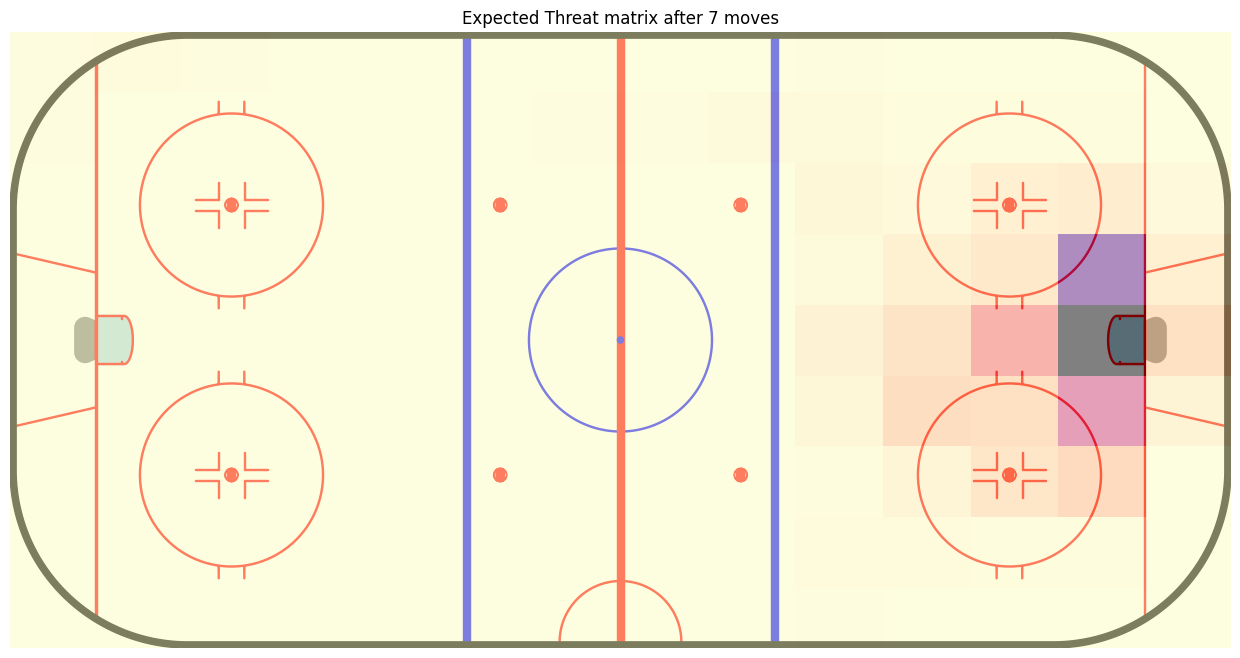

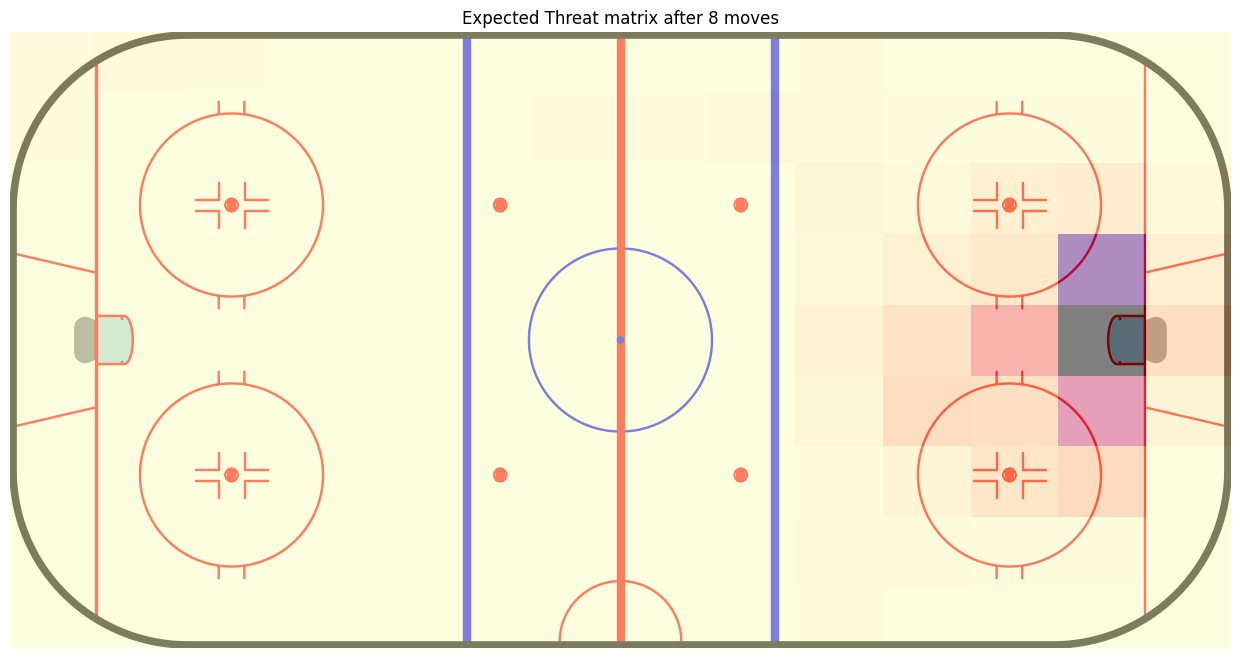

In [74]:
transition_matrices_array = np.array(transition_matrices)
xT = np.zeros((9, 16))
for i in range(8):
    shot_expected_payoff = goal_prob*shot_prob
    move_expected_payoff = move_prob*(np.sum(np.sum(transition_matrices_array*xT, axis=2), axis=1).reshape(9, 16))
    xT_old = xT
    xT = shot_expected_payoff + move_expected_payoff
    fig, ax = plt.subplots(figsize=(18, 8))
    rink.draw(ax=ax)
    plt.imshow(xT, cmap='magma_r', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)
    txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
    plt.title(txt)
    plt.show()

In [75]:
xT_against = np.flip(xT) * -1

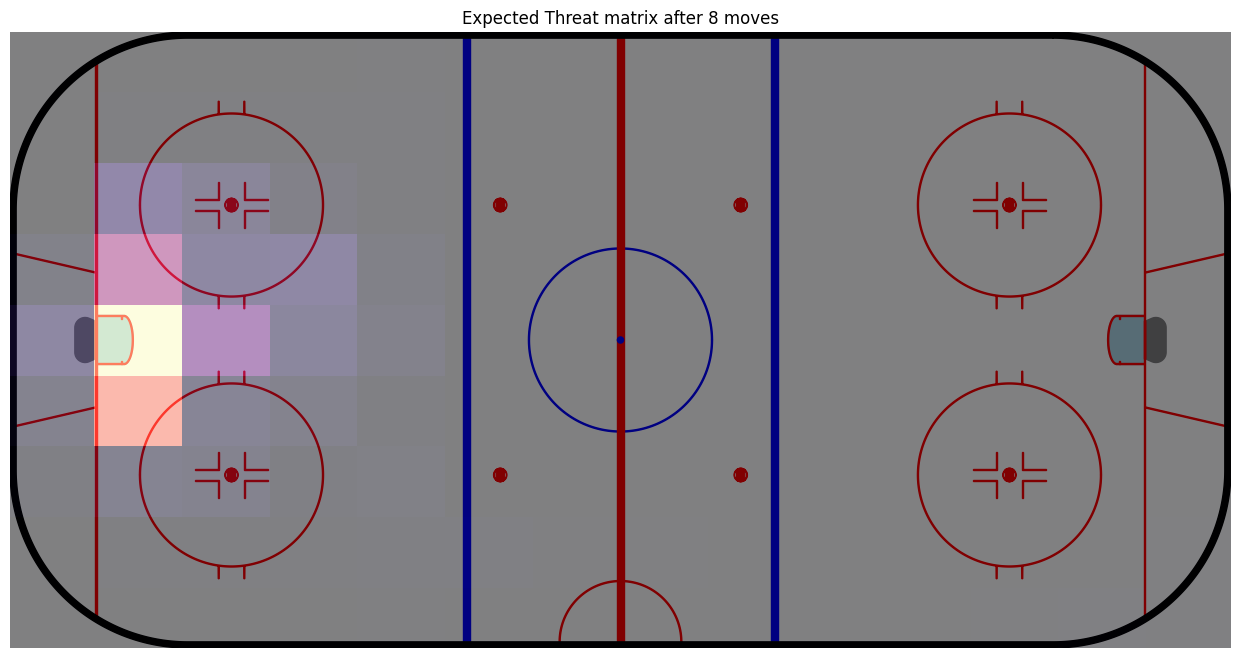

In [76]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT_against, cmap='magma_r', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)
txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
plt.title(txt)
plt.show()

In [77]:
xT_net = xT + xT_against

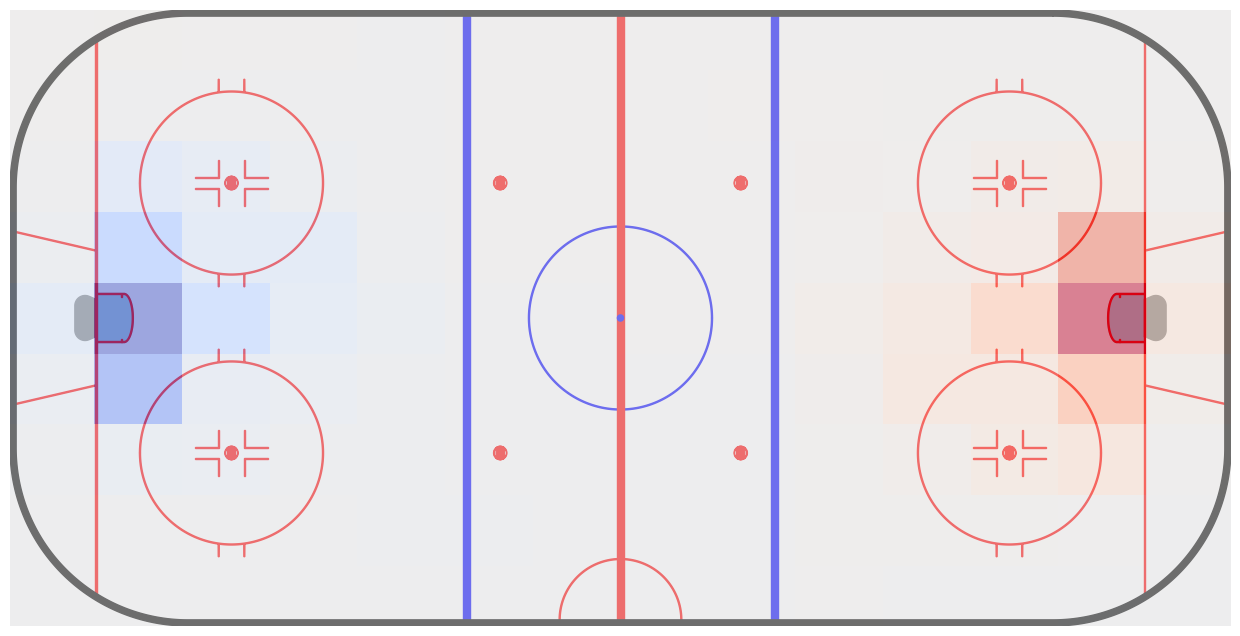

In [78]:
fig, ax = plt.subplots(figsize=(18, 8))
rink.draw(ax=ax)
plt.imshow(xT_net, cmap='coolwarm', origin='lower', extent=[-114.28571429, 114.28571429, -51.9, 51.9], alpha=0.5, zorder=100)
#txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
#plt.title(txt)
plt.show()

fig.savefig('figs/xt_net_overview.png', dpi=300, bbox_inches='tight')

In [80]:
np.savetxt('data/xT_net.csv', xT_net, delimiter=',')
np.savetxt('data/xT.csv', xT, delimiter=',')
np.savetxt('data/xT_against.csv', xT_against, delimiter=',')